# **Création d'un réseau de neurones à 2 couches** - *Inspiré de la formation de Machine Learnia*

Nous avons déjà développé 1 neurone artificiel défini tel que :

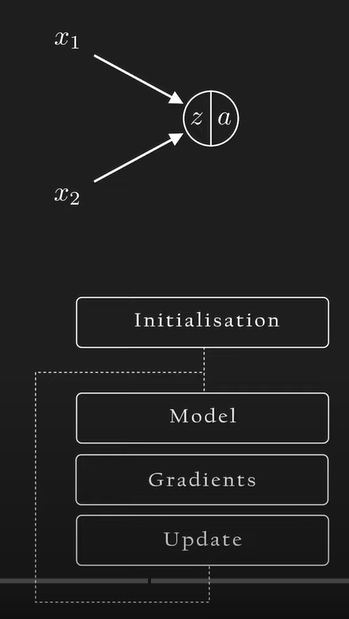

Nous allons développer un réseau de neurones artificiels à 2 couches défini tel que :

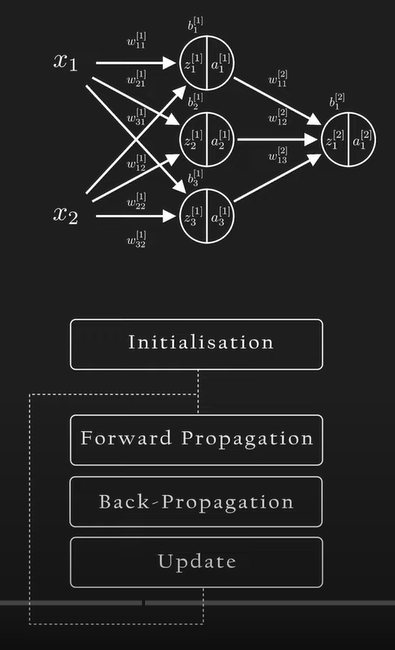

# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# 1. Fonctions

Initialement, nous avons l'équation Z = X . W + b :

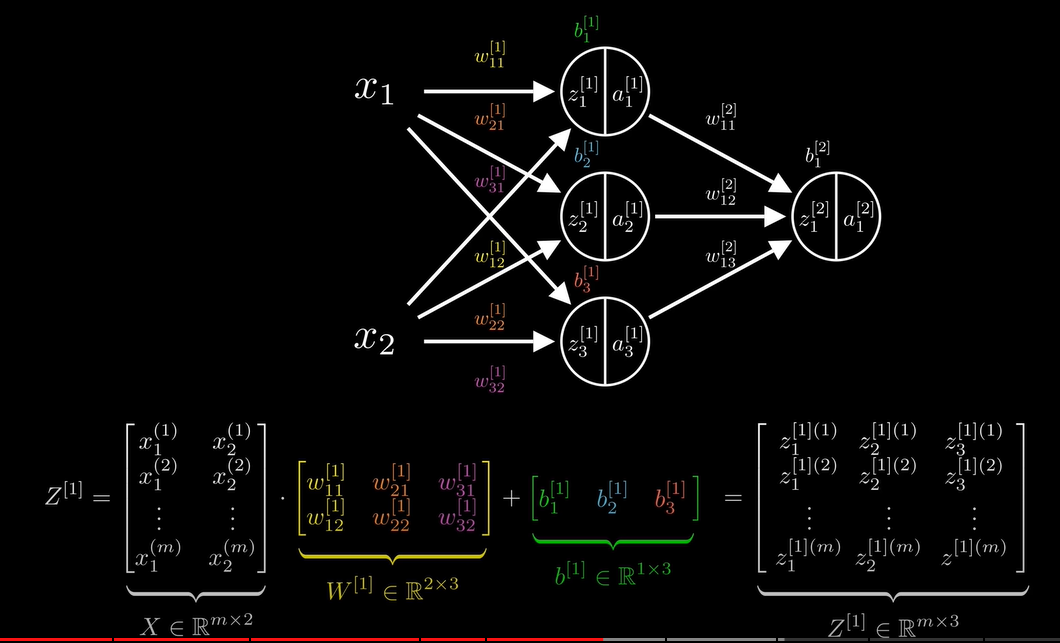

Mais nous allons re-organiser notre équation tel que Z = W . X + b

Pour cela, nous devons re-adapter nos dimensions tel que :

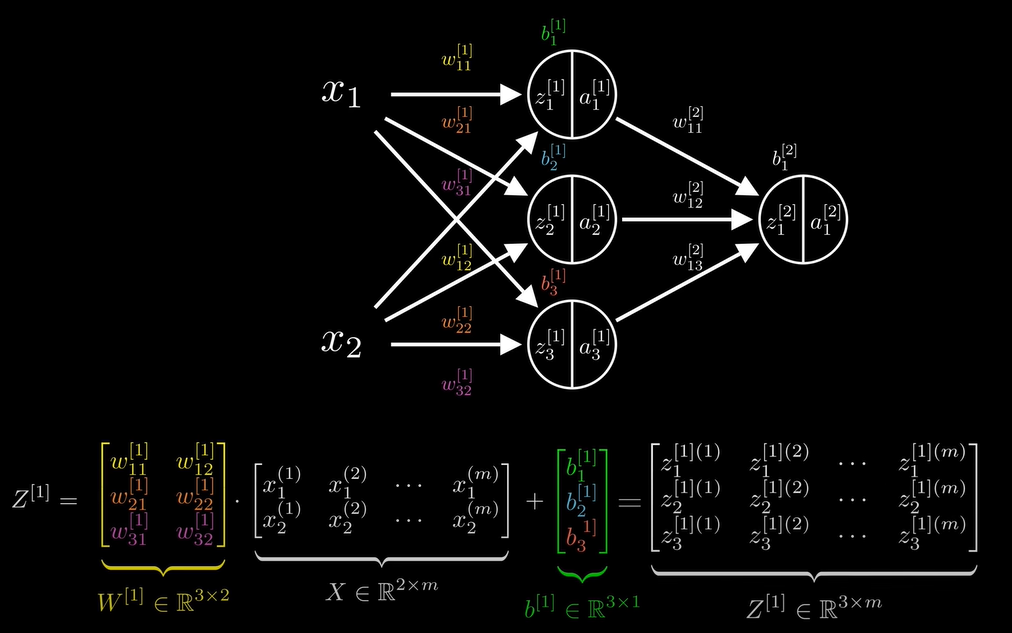

Ainsi, notre Forward Propagation se définit tel que :

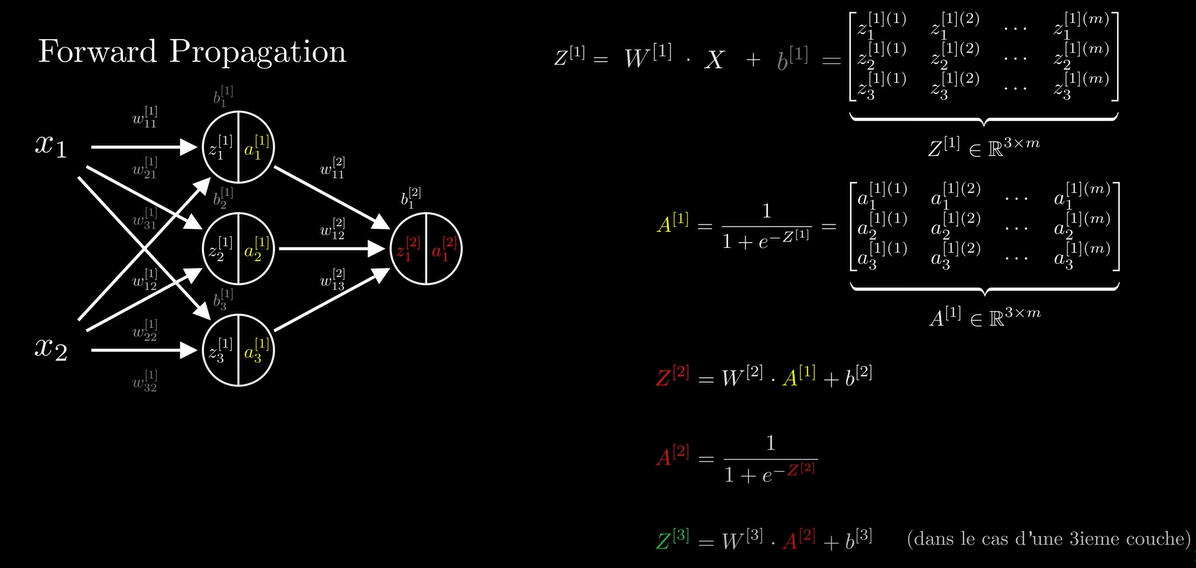

Voici les dimensions de nos poids et biais de chaque couche :

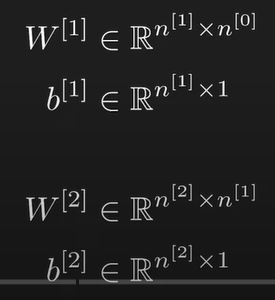

On peut définir notre fonction d'initialisation, en respectant ces dimensions :

In [2]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

Voici les équations de notre Forward Propagation :

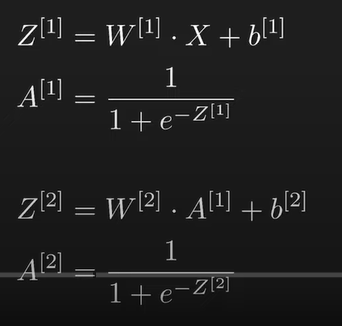

Notre fonction Forward Propagation se définit donc tel que :

In [3]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

Voici les équations de notre Back Propagation :

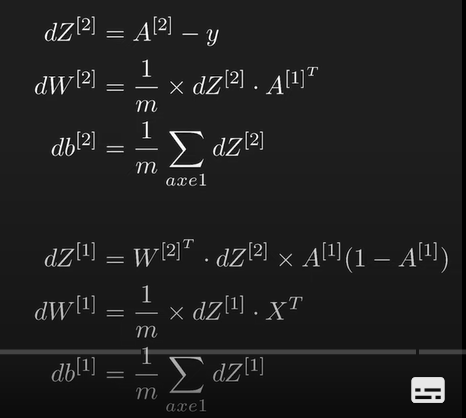

Notre fonction Back Propagation se définit donc tel que :

In [4]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

Attention, les dimensions sont importantes et doivent être respectées, sinon le Broadcasting peut provoquer des effets indésirables :

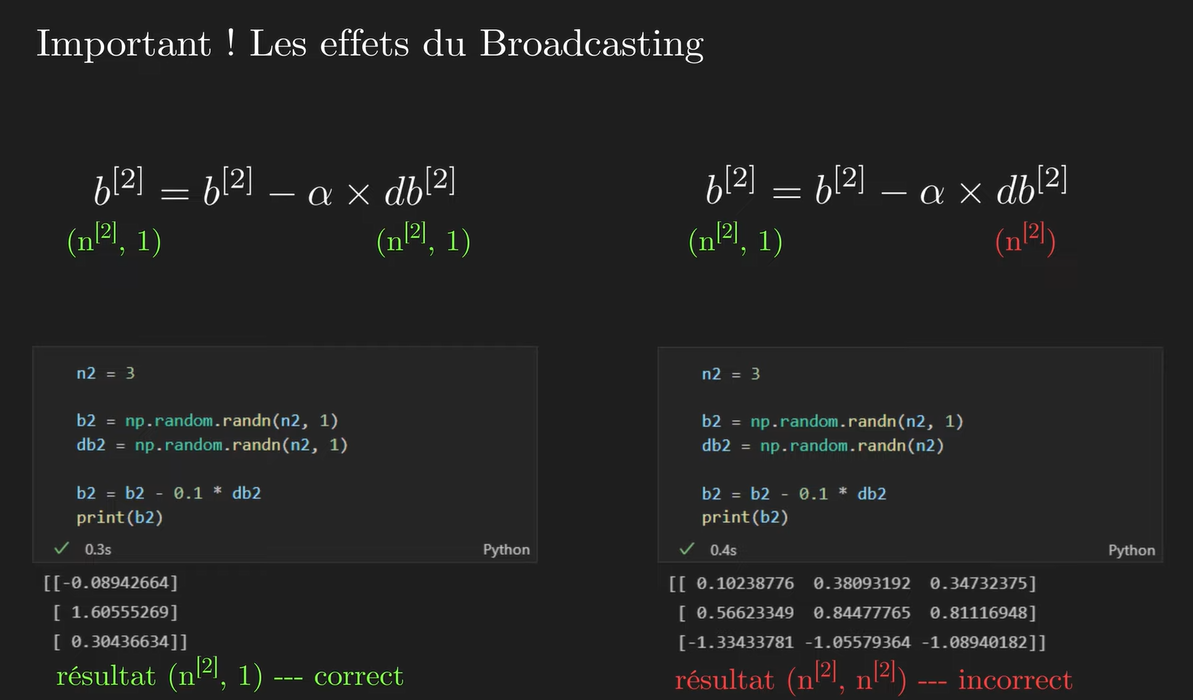

Voici les équations de mises à jours de nos poids et biais pour chaque couche de notre réseau de neurones :

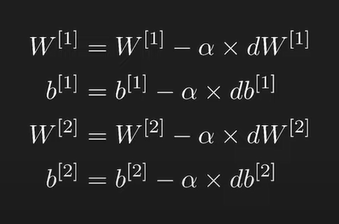

Notre fonction de mise à jour de nos poids et biais se définit donc tel que :

In [5]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

Notre fonction de prédiction se définit donc tel que :

In [6]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

Voici notre fonction pour tracer la frontière de décision :

In [7]:
def plot_decision_boundary(X, y, parametres):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parametres)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    plt.scatter(X[0, :], X[1, :], c=y, edgecolors='k', cmap='summer')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Pour faire un rappel sur les dimensions associées à chaque couche de notre réseau de neurones :

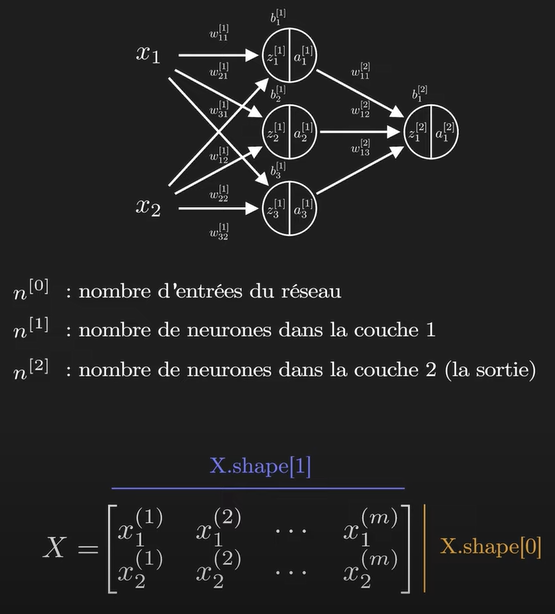

Voici notre fonction de réseau de neurones finale :

In [8]:
def neural_network(X, y, n1=32, learning_rate=0.1, n_iter=1000):
    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    plot_decision_boundary(X, y, parametres)
    return parametres

# 2. Dataset

Créons un dataset plus complexe, dont les 2 classes de points ne peuvent pas être séparés linéairement :

dimensions de X: (2, 100)
dimensions de y: (1, 100)


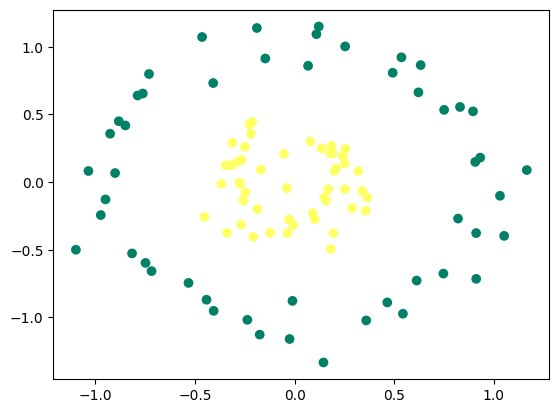

In [9]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

Regardons la performance de notre réseau de neurones :

100%|██████████| 1000/1000 [00:08<00:00, 117.48it/s]


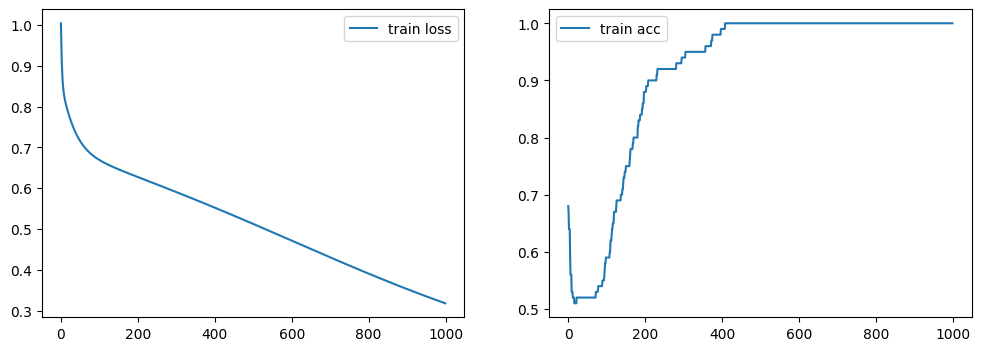

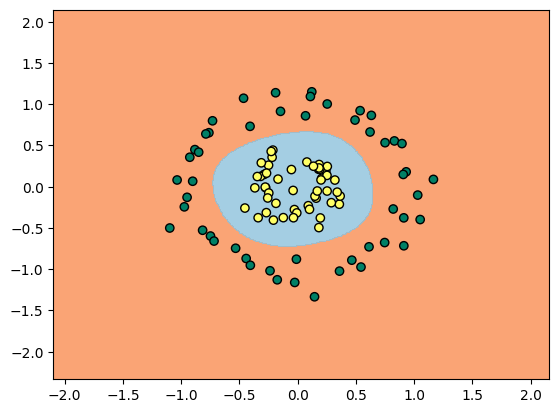

{'W1': array([[ 1.80212588,  0.37821374],
        [ 1.01147118,  2.72196966],
        [ 2.58920092, -1.12112355],
        [ 1.0508304 , -0.23999551],
        [-0.32911352,  0.61126472],
        [ 0.10449739,  1.5211303 ],
        [ 0.90568599,  0.00334079],
        [ 0.44974817,  0.32479341],
        [ 2.19228574, -0.55199865],
        [ 0.07362119, -0.72521454],
        [-2.55294805,  0.64962759],
        [ 0.79621311, -0.67148306],
        [ 2.47060832, -1.49806086],
        [-0.08319614, -0.07417017],
        [ 1.61979578,  1.66597748],
        [ 0.1398299 ,  0.38577941],
        [-1.5500226 , -2.61344251],
        [-0.19459163,  0.0227914 ],
        [ 1.3320316 ,  1.1949539 ],
        [-0.71462983, -0.02385873],
        [-1.23999647, -2.47955126],
        [-2.07311228,  2.57822617],
        [-0.31829059, -0.65082684],
        [-1.46140776,  0.96926358],
        [-2.59100928, -0.09863181],
        [-0.78361708,  0.24660244],
        [-0.63362911, -1.18964448],
        [ 0.17256072, 

In [10]:
neural_network(X, y, n1=32)